<a href="https://colab.research.google.com/github/Fidelrock/docs/blob/main/Copy_of_Customer_Purchase_Behavior_and_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:


from google.colab import files

uploaded = files.upload()

Saving Customer_Purchase_Behavior_and_Churn_Analysis.csv to Customer_Purchase_Behavior_and_Churn_Analysis.csv


In [ ]:
import pandas as pd
df=pd.read_csv('Customer_Purchase_Behavior_and_Churn_Analysis.csv')
df.head()


,CustomerID,Age,Gender,MaritalStatus,Income,ProductCategory,PurchaseAmount,PurchaseFrequency,Churned
0,CUST001,29,FEMALE,Divorced,60753.92,Clothing,4983,8,No (80%)
1,CUST002,68,MALE,Married,31900.94,Electronics,1948,5,Yes (20%)
2,CUST003,26,MALE,Married,93081.15,Groceries,482,11,Yes (20%)
3,CUST004,42,FEMALE,Divorced,46932.25,Electronics,2030,12,No (80%)
4,CUST005,45,FEMALE,Single,59859.77,Clothing,2894,11,No (80%)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1000 non-null   object 
 1   Age                1000 non-null   int64  
 2   Gender             1000 non-null   object 
 3   MaritalStatus      1000 non-null   object 
 4   Income             1000 non-null   float64
 5   ProductCategory    1000 non-null   object 
 6   PurchaseAmount     1000 non-null   int64  
 7   PurchaseFrequency  1000 non-null   int64  
 8   Churned            1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
MaritalStatus,0
Income,0
ProductCategory,0
PurchaseAmount,0
PurchaseFrequency,0
Churned,0


Text(0.5, 1.0, 'Churn Distribution')

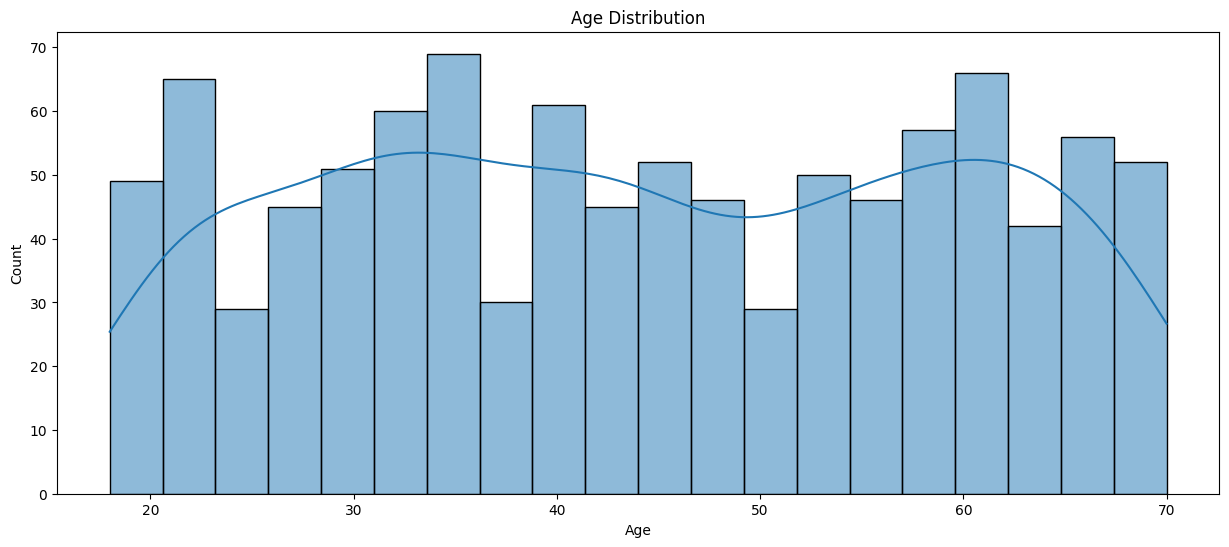

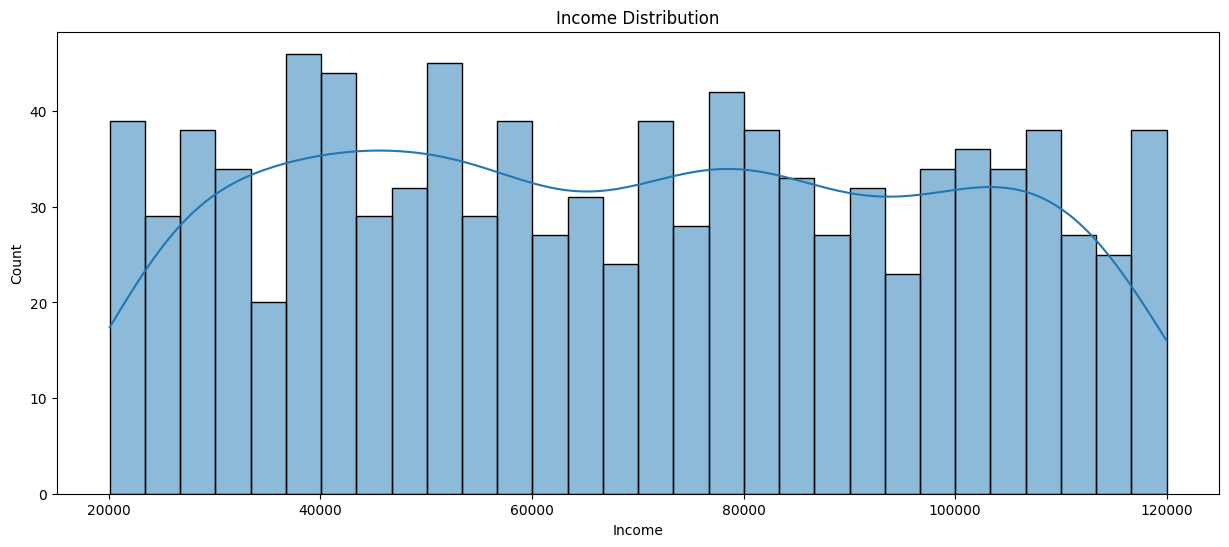

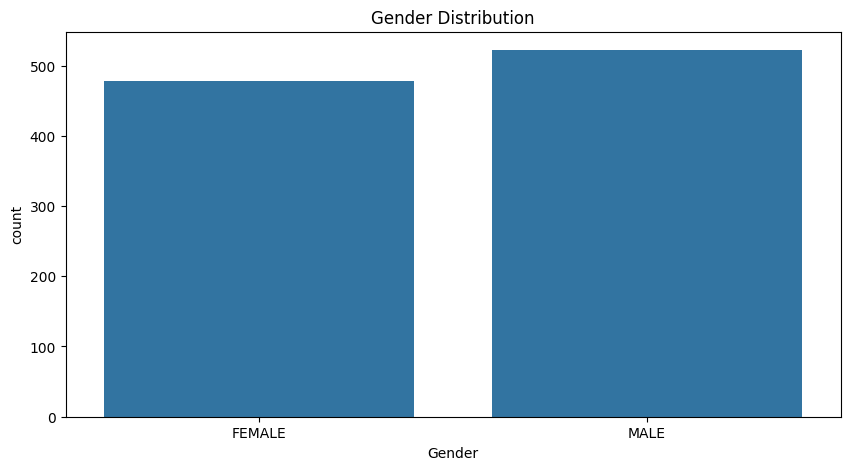

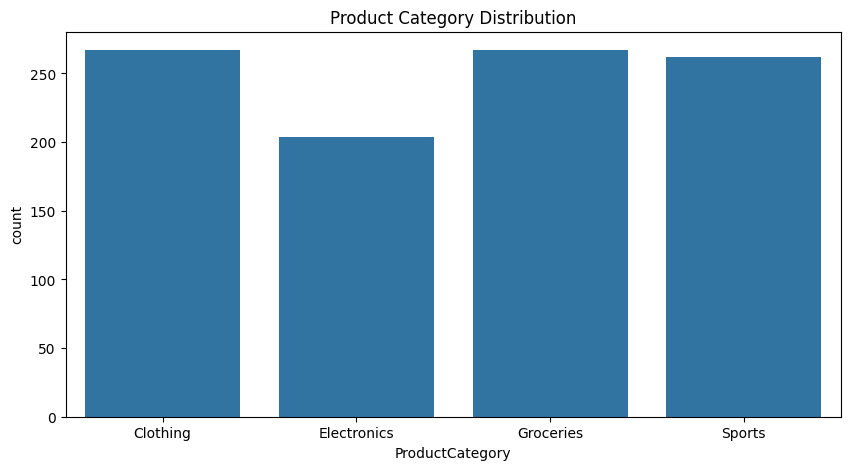

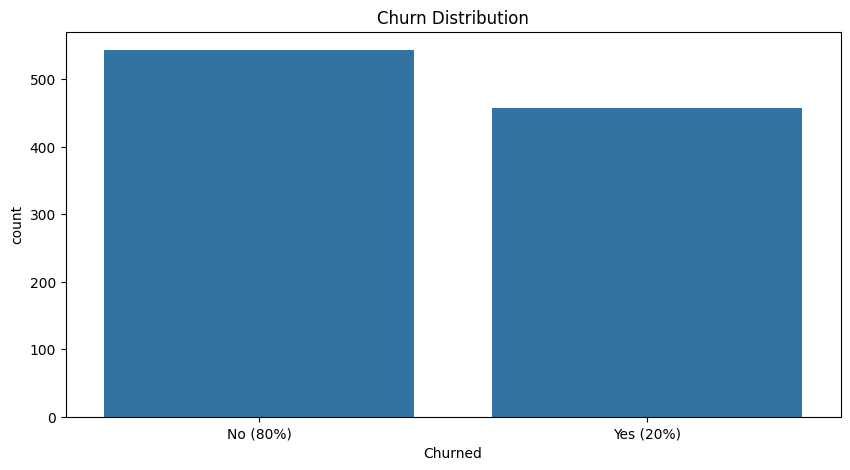

In [ ]:
# Distribution plots
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title("Age Distribution")

plt.figure(figsize=(15,6))
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.title("Income Distribution")

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='ProductCategory')
plt.title("Product Category Distribution")

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Churned')
plt.title("Churn Distribution")

Text(0.5, 1.0, 'Correlation Heatmap')

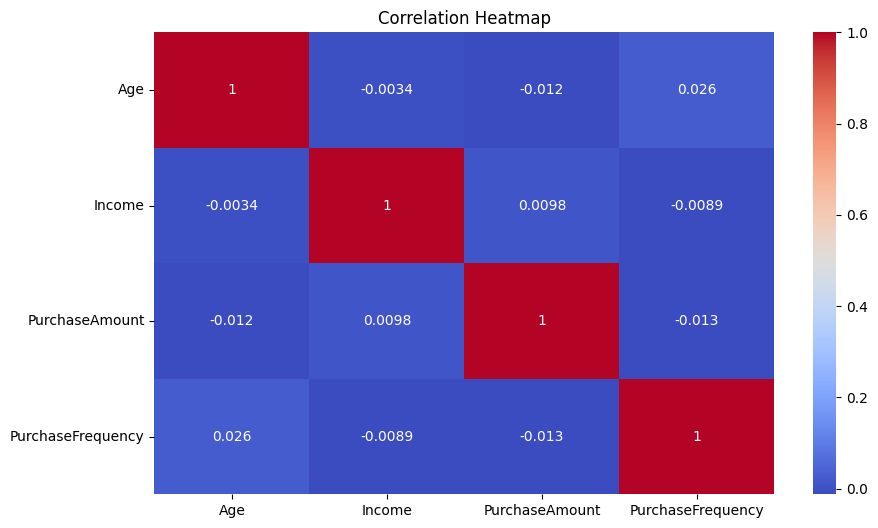

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1000 non-null   int64  
 1   Gender             1000 non-null   int64  
 2   MaritalStatus      1000 non-null   int64  
 3   Income             1000 non-null   float64
 4   ProductCategory    1000 non-null   int64  
 5   PurchaseAmount     1000 non-null   int64  
 6   PurchaseFrequency  1000 non-null   int64  
 7   Churned            1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB



Logistic Regression Accuracy: 0.5440
              precision    recall  f1-score   support

           0       0.58      0.74      0.65       145
           1       0.43      0.27      0.33       105

    accuracy                           0.54       250
   macro avg       0.51      0.51      0.49       250
weighted avg       0.52      0.54      0.52       250



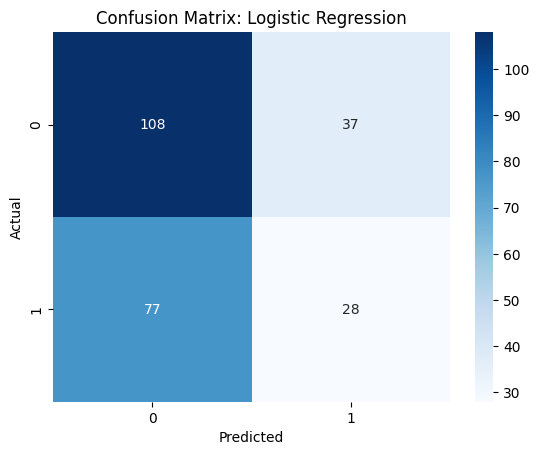


Decision Tree Accuracy: 0.5200
              precision    recall  f1-score   support

           0       0.60      0.51      0.55       145
           1       0.44      0.53      0.48       105

    accuracy                           0.52       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.53      0.52      0.52       250



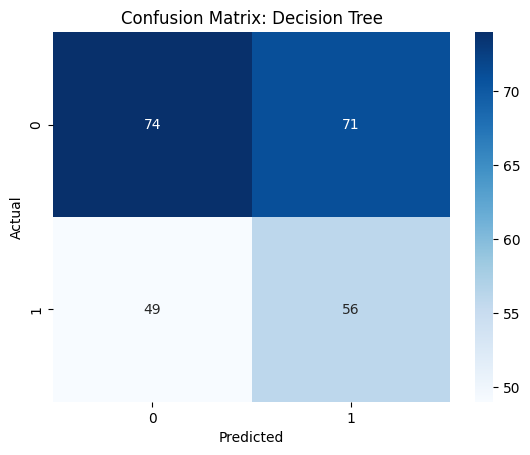


Random Forest Accuracy: 0.5360
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       145
           1       0.45      0.45      0.45       105

    accuracy                           0.54       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.54      0.54      0.54       250



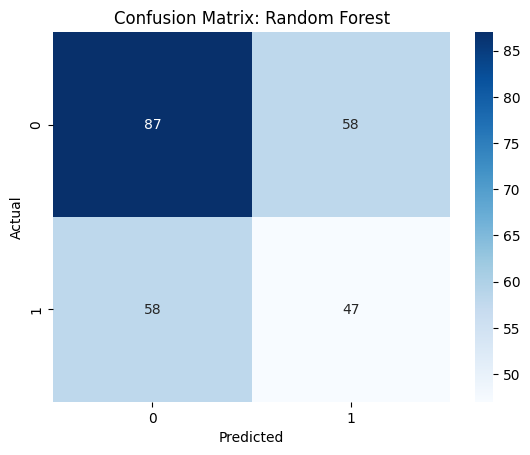


SVM Accuracy: 0.5600
              precision    recall  f1-score   support

           0       0.60      0.72      0.66       145
           1       0.47      0.33      0.39       105

    accuracy                           0.56       250
   macro avg       0.53      0.53      0.52       250
weighted avg       0.54      0.56      0.54       250



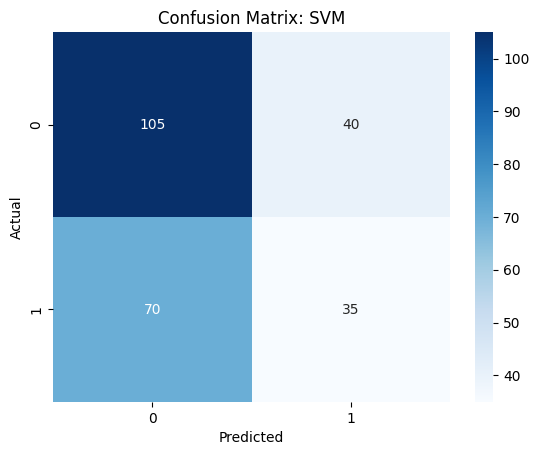


K-Nearest Neighbors Accuracy: 0.5080
              precision    recall  f1-score   support

           0       0.59      0.52      0.55       145
           1       0.43      0.50      0.46       105

    accuracy                           0.51       250
   macro avg       0.51      0.51      0.50       250
weighted avg       0.52      0.51      0.51       250



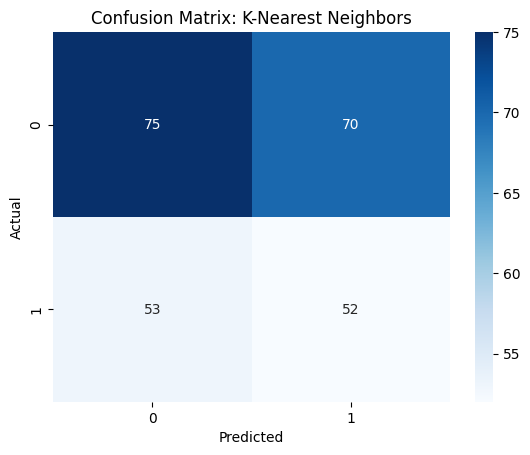


Naive Bayes Accuracy: 0.5520
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       145
           1       0.45      0.32      0.38       105

    accuracy                           0.55       250
   macro avg       0.52      0.52      0.51       250
weighted avg       0.54      0.55      0.54       250



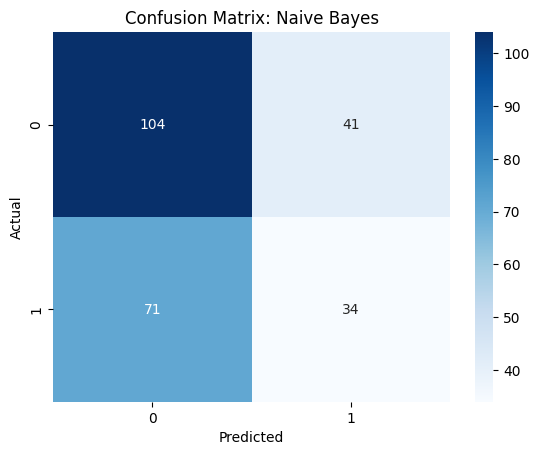

In [ ]:
# 5. Model Training & Comparison

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


<ipython-input-17-489309ed2b52>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')


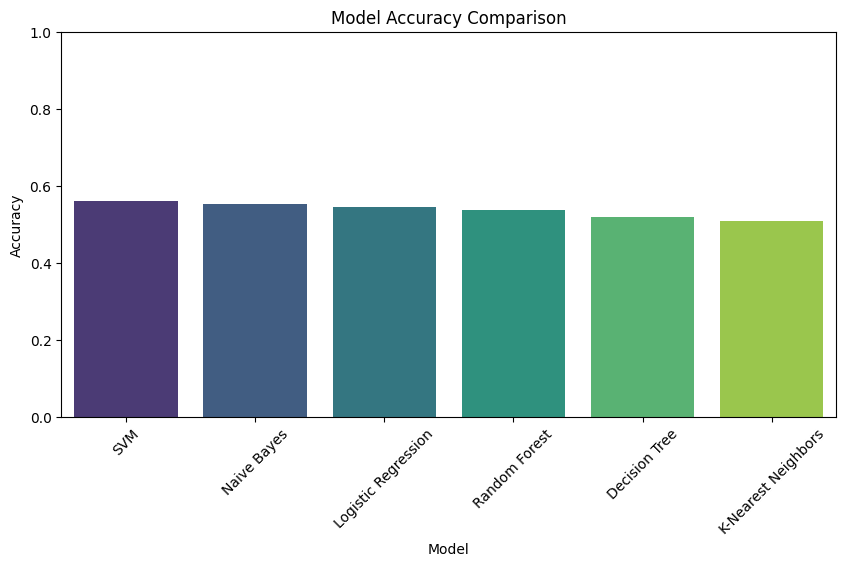

In [ ]:
# 6. Accuracy Comparison Plot
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()
